This competition is hosted by Santander Bank.
Given 200 anonymized variables and 200000 rows of data, competitors are asked to predict which customers will transact in the future.
In fact, the data is so unique that none of them have a strong correlation with target variable and all of them are normally-distributed. As such, EDA is of little-use in this competition. However, seasoned competitors are able to make use of the way LightGBM splits the nodes to determine which features to engineer.

We begin by importing train & test data:

In [2]:
import pandas as pd
import numpy as np
main = pd.read_excel('train')
test = pd.read_excel('test')

In [2]:
test_copy = test.copy()

In [15]:
test_copy

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_195,var_196,var_197,var_198,var_199,var_12_freq,var_13_freq,var_68_freq,var_108_freq,var_126_freq
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,2.4669,4.3654,10.7200,15.4722,-8.7197,24,2,754,15,4
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,0.4773,-1.4852,9.8714,19.1293,-20.9760,45,7,306,10,8
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,2.1281,-7.1086,7.0618,19.8956,-23.1794,13,3,391,47,6
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,3.1656,3.9567,9.2295,13.0168,-4.2108,48,1,314,257,7
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,-0.2860,-5.1612,7.2882,13.9260,-9.1846,30,6,746,38,17
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.2151,-6.0233,9.8117,17.1127,10.8240,38,3,1097,60,11
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,0.0295,7.7443,9.1509,18.4736,5.1499,21,3,960,33,5
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,-1.7931,6.5316,10.4855,23.4631,0.7283,19,1,58,57,6
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,0.1221,-1.4328,9.9207,16.9865,-3.3304,16,4,654,33,13
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,0.6075,-4.4447,9.5788,15.8146,9.3457,15,3,1042,66,2


In [ ]:
X_test = test_copy.drop(['ID_code'],axis=1)

Checking first 5 rows of train data:

In [3]:
#Checking columns
main.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


It is always a good habit to make a copy of train dataset so that any manipulations will not affect our original train data:

In [4]:
#Make a copy
main_copy = main.copy()
main_copy.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Let's split features up before doing EDA:

In [6]:
#Create input features
y = main_copy['target']
X = main_copy.drop(['ID_code','target'],axis=1)

START OF EDA SECTION

First, we check for missing values:

In [7]:
#Exploratory Data Analysis
#Check for null values
X.columns[X.isna().any()].tolist()

[]

From our result, no columns contain null values.

Next, we check for constant features:

In [8]:
#Exploratory Data Analysis
#Check for constant features
(X.nunique(axis=1)==1).value_counts()

False    200000
dtype: int64

From our result, no columns contain constant values.

Next, we check if duplicate features exist:

In [9]:
#Exploratory Data Analysis
#Check for duplicate features and drop them
X.T.drop_duplicates(subset=None,keep = False,inplace=True)
len(X.columns.values)

200

From our result, no duplicated columns exist.

Since Kaggle forum mentioned a severe lack of class 1, we check proportion of target==1:

In [10]:
#Exploratory Data Analysis
len(main[main_copy['target']==1])/len(main)*100

10.049

Only 10% of targets are 1. This presents a serious problem since our model may not learn much to differentiate between the 2 classes. 
We need to fix this later.

Let's check the unique values for each column:

In [11]:
#Exploratory Data Analysis
#Number of uniqueness
X.nunique().sort_values()

var_68        451
var_91       7962
var_108      8525
var_103      9376
var_12       9561
var_148     10608
var_161     11071
var_71      13527
var_25      14853
var_43      15188
var_125     16059
var_166     17902
var_169     18242
var_133     19236
var_15      19810
var_131     21464
var_23      24913
var_34      25164
var_93      26708
var_95      29387
var_42      31592
var_50      32308
var_126     32411
var_98      33266
var_53      33460
var_57      35545
var_28      35859
var_130     36638
var_59      37744
var_6       38599
            ...  
var_51     143455
var_118    143667
var_19     144180
var_83     144281
var_137    144397
var_158    144556
var_54     144776
var_82     144829
var_184    145184
var_178    145235
var_30     145977
var_102    146237
var_96     148099
var_149    148504
var_182    149195
var_199    149430
var_100    150727
var_48     152039
var_70     153193
var_47     154781
var_160    156274
var_136    156615
var_187    157031
var_90     157210
var_120   

var_68 only has 451 unique values while other variables have thousands of unique values.

There are suggestions that this could be a date variable.
Yet, it has been shown that this variable is normally-distributed hence making it very-unlikely to be date variable.
Nonetheless, this variable has been anonymized and if we were to treat this variable as date variable, we will have to de-anonymized it before extracting any useful information from it.
Due to time constraints, we shall not do this.

Let's examine correlation between input variables & target variable:

In [15]:
#Exploratory Data Analysis
corr = main.corr()
abs(corr['target']).sort_values(ascending=False)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
var_174    0.061669
var_22     0.060558
var_21     0.058483
var_99     0.058367
var_166    0.057773
var_80     0.057609
var_190    0.055973
var_2      0.055870
var_165    0.055734
var_13     0.055156
var_148    0.055011
var_133    0.054548
var_198    0.053000
var_34     0.052692
var_0      0.052390
var_1      0.050343
var_115    0.050174
var_179    0.050002
var_109    0.049926
var_40     0.049530
             ...   
var_61     0.007407
var_182    0.007198
var_153    0.007103
var_73     0.006460
var_14     0.006332
var_60     0.006265
var_129    0.005880
var_46     0.005690
var_183    0.005467
var_160    0.005135
var_29     0.004682
var_124    0.004218
var_161    0.004168
var_39     0.004090
var_98     0.004074
var_158    0.003817
var_136    0.003554
var_96     0.003037
var_7      0.003025


Notice that largest correlation coefficient is 0.08, which is still very weak.
It seems that all of them are weak learners and our model choice needs to make use of this later.

Let's show the density plot of variables in train dataset:

C:\Users\weiquan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

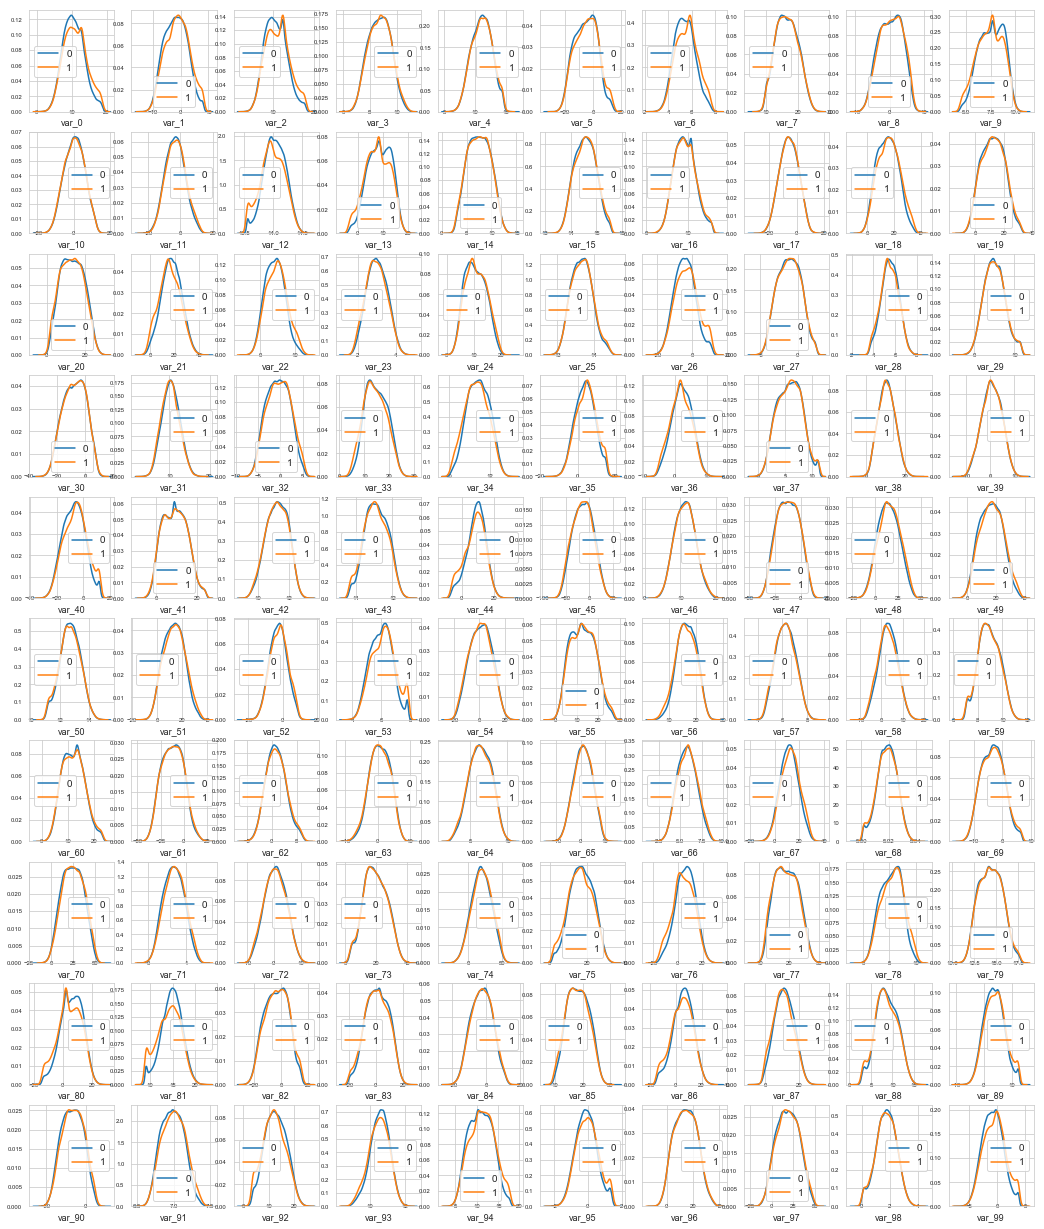

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_feature_distribution(df1,df2,label1,label2,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig,ax = plt.subplots(10,10,figsize=(18,22))
    
    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature],hist = False,label=label1)
        sns.distplot(df2[feature],hist = False,label=label2)
        plt.xlabel(feature,fontsize=9)
        locs,labels = plt.xticks()
        plt.tick_params(axis='x',which='major',labelsize=6,pad=-6)
        plt.tick_params(axis='y',which='major',labelsize=6)
    plt.show()    

t0 = main.loc[main['target'] == 0]
t1 = main.loc[main['target'] == 1]
features = main.columns.values[2:102]
plot_feature_distribution(t0,t1,'0','1',features)

C:\Users\weiquan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

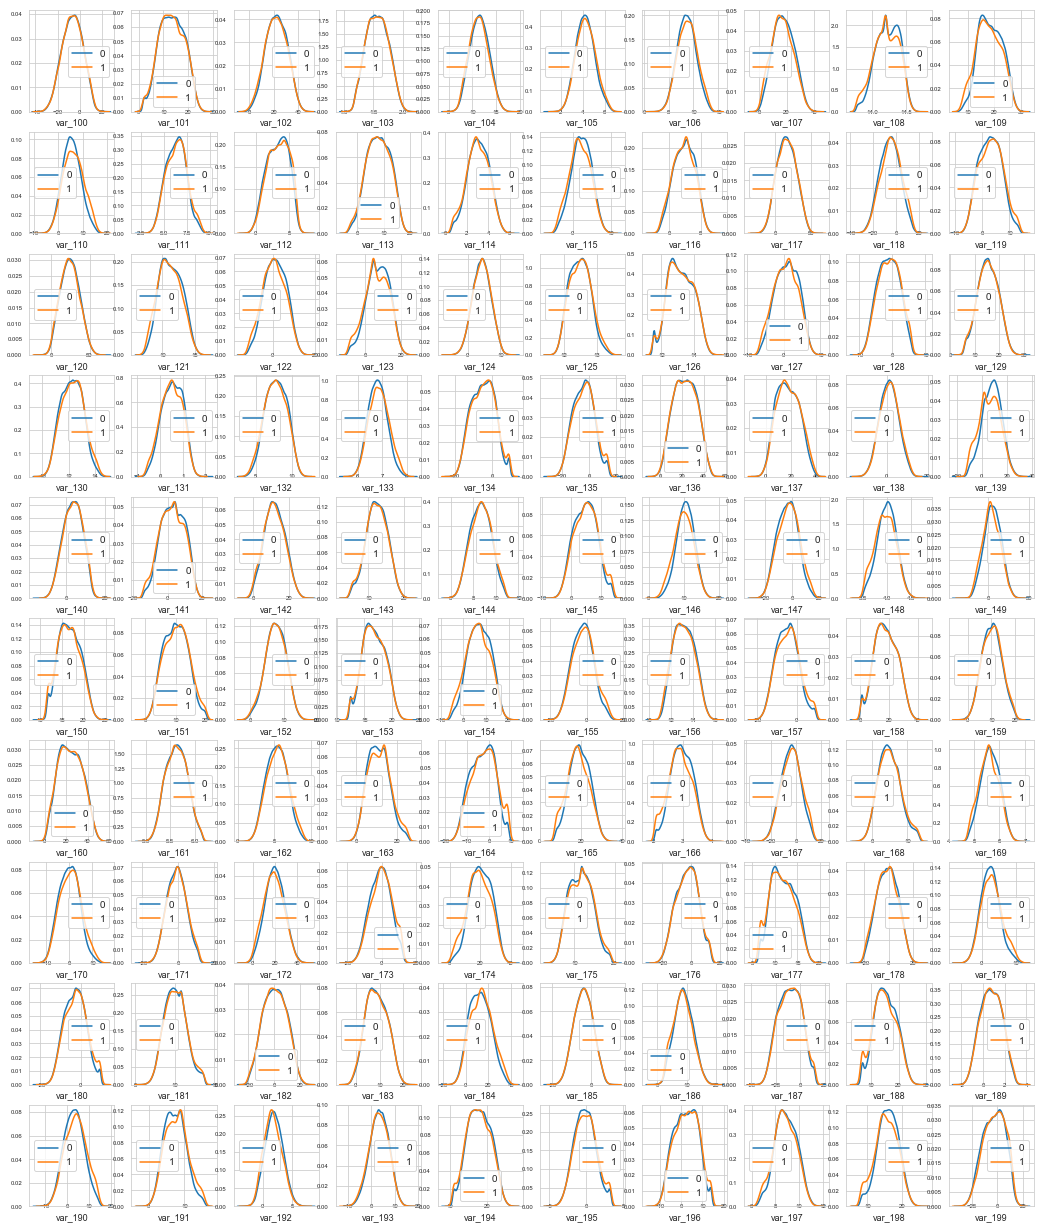

In [23]:
features = main.columns.values[102:202]
plot_feature_distribution(t0,t1,'0','1',features)

Notice that all of them are normally-distributed.

END OF EDA SECTION

START OF FE SECTION

At this point, we tried countless methods but to no avail.
After scouring through the forum, there seems to be a general agreement that including frequency columns for all 200 variables will result in a large increase in model accuracy.
However due to time constraints, we only implemented it for 5 variables:

In [25]:
#Feature Engineering
#Create frequency column for each feature column
for i in main_copy.columns:
    print(i)
    if i in  ['var_12','var_13','var_108','var_126','var_68']:
        main_copy[i+'_freq'] = pd.DataFrame(columns=[i+'freq'])
        for j in main_copy[i].unique():
            for k in main_copy.index[main_copy[i] == j].tolist():
                main_copy.set_value(k,i+'_freq',len(main_copy[main_copy[i] == j]))
            

ID_code
target
var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136

In [12]:
#FINAL TRAINING DATASET

Let's take a look at our final training set:

In [26]:
main_copy

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_195,var_196,var_197,var_198,var_199,var_12_freq,var_13_freq,var_68_freq,var_108_freq,var_126_freq
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,-2.3978,7.8784,8.5635,12.7803,-1.0914,35,1,573,46,8
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,2.0339,8.1267,8.7889,18.3560,1.9518,46,2,1060,10,4
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,3.1417,-6.5213,8.2675,14.7222,0.3965,28,2,1006,30,10
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,-1.2706,-2.9275,10.2922,17.9697,-8.9996,39,2,1060,43,14
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.5121,3.9267,9.5031,17.9974,-8.8104,22,1,346,23,9
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,1.0314,-3.6241,9.7670,12.5809,-4.7602,3,1,571,46,8
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,0.5845,9.1104,9.1143,10.8869,-3.2097,39,2,993,50,10
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,-0.3776,4.2178,9.4237,8.6624,3.4806,18,3,751,26,4
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,-1.9940,-1.0733,8.1975,19.5114,4.8453,37,1,1054,39,8
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.4467,14.1287,7.9133,16.2375,14.2514,34,1,840,38,5


Changing data-type & re-defining our input & target variables:

In [32]:
main_copy['var_68_freq'] = pd.to_numeric(main_copy['var_68_freq'])
main_copy['var_12_freq'] = pd.to_numeric(main_copy['var_12_freq'])
main_copy['var_13_freq'] = pd.to_numeric(main_copy['var_13_freq'])
main_copy['var_108_freq'] = pd.to_numeric(main_copy['var_108_freq'])
main_copy['var_126_freq'] = pd.to_numeric(main_copy['var_126_freq'])
y = main_copy['target']
X = main_copy.drop(['ID_code','target'],axis=1)

We repeat the process for test set:

In [ ]:
#FINAL TEST DATASET
for i in test_copy.columns:
    print(i)
    if i in ['var_12','var_13','var_108','var_126','var_68']:
        test_copy[i+'_freq'] = pd.DataFrame(columns=[i+'freq'])
        for j in test_copy[i].unique():
            for k in test_copy.index[test_copy[i] == j].tolist():
                test_copy.set_value(k,i+'_freq',len(test_copy[test_copy[i] == j]))

In [ ]:
test_copy['var_68_freq'] = pd.to_numeric(test_copy['var_68_freq'])
test_copy['var_12_freq'] = pd.to_numeric(test_copy['var_12_freq'])
test_copy['var_13_freq'] = pd.to_numeric(test_copy['var_13_freq'])
test_copy['var_108_freq'] = pd.to_numeric(test_copy['var_108_freq'])
test_copy['var_126_freq'] = pd.to_numeric(test_copy['var_126_freq'])

In [36]:
X_test = test_copy.drop(['ID_code'],axis=1)

To solve class-imbalance problem, we introduce a data augmentation technique that over-samples both categories.
We do this by tripling the size of the minor class and doubling the size of the major class: 

In [37]:
#Feature Engineering
#Data augmentation for minority class
#To investigate and edit accordingly!
def augment(input_X,input_y):
    #Triples minor category
    mask = input_y>0
    x1 = input_X[mask].copy()     
    new_input_X = input_X.append(x1.sample(frac=1))
    new_input_X = new_input_X.append(x1.sample(frac=1))
    #new_input_X = new_input_X.append(x1.sample(frac=1))
    new_input_y = input_y.append(input_y[mask])
    new_input_y = new_input_y.append(input_y[mask])
    #new_input_y = new_input_y.append(input_y[mask])
    
    #Doubles major category
    mask = input_y==0
    x1 = input_X[mask].copy()
    new_input_X = new_input_X.append(x1.sample(frac=1))
    #new_input_X = new_input_X.append(x1.sample(frac=1))
    new_input_y = new_input_y.append(input_y[mask])
    #new_input_y = new_input_y.append(input_y[mask])
    return new_input_X,new_input_y

END OF FE SECTION

START OF MODELING SECTION

In [41]:
#Modelling
#Create oof function
def oof_create():
    oof = main_copy_new.sample(frac=1)
    oof_target = oof['target']
    oof_input = oof.drop(['ID_code','target'],axis=1)
    return oof_input,oof_target

We use LightGBM for our model due to the large presence of weak learners.
Similar to XGBoost, LightGBM is able to combine weak learners into one single strong learner.
However, LightGBM is proven to reach a slightly-higher accuracy than XGBoost at a much-lower training time.
Also, we shall use stratified K-folds validation since presence of extreme class-inbalance suggests strong need to preserve class % for each training fold.

In [42]:
#Modelling
#LightGBM with STRATIFIED K-FOLDS VALIDATION (NO PCA)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
predictions = test[['ID_code']]
random_state = 0
lgb_params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 13,
    "num_threads" : 8,
    "learning_rate" : 0.01,
    "bagging_freq": 5,
    "bagging_fraction" : 0.4,
    "feature_fraction" : 0.05,
    "min_data_in_leaf": 80,
    #"min_sum_hessian_in_leaf" : 10,
    "tree_learner": "serial",
    "boost_from_average": "false",
    #"lambda_l1" : 5,
    #"lambda_l2" : 5,
    "bagging_seed" : random_state,
    "verbosity" : 1,
    "seed": random_state
}



folds = 5
fold = 0
skf = StratifiedKFold(n_splits=folds,shuffle=True,random_state=random_state)
s_valid=[]
s_oof = []
for train_index, test_index in skf.split(X,y):
    input_train = X.loc[train_index]
    target_train = y.loc[train_index]
    N = 5
    p_valid,yp = 0,0
    for i in range(N):
        auginput_train,augtarget_train = augment(input_train,target_train)
        trn_data = lgb.Dataset(auginput_train, label=augtarget_train)
        val_data = lgb.Dataset(X.loc[test_index], label=y.loc[test_index])
        evals_result = {}
        lgb_clf = lgb.train(lgb_params,trn_data,100000,valid_sets = [trn_data, val_data],early_stopping_rounds=3000,verbose_eval = 1000,evals_result=evals_result)
        yp += lgb_clf.predict(X_test)
        p_valid += lgb_clf.predict(X.loc[test_index])
    oof_input,oof_target = oof_create()
    p_oof = lgb_clf.predict(oof_input)  
    score_oof = roc_auc_score(oof_target, p_oof)
    s_oof.append(score_oof)
    p_valid_final = p_valid/N
    score_val = roc_auc_score(y.loc[test_index], p_valid_final)
    s_valid.append(score_val)
    fold += 1
    predictions['fold{}'.format(fold)] = yp/N
    #Understand before implementing
    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = features
    #fold_importance_df["importance"] = lgb_clf.feature_importance()
    #fold_importance_df["fold"] = fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #oof['predict'][val_idx] = p_valid/N
    #Check this
    #val_score = roc_auc_score(y.loc[test_index], p_valid)
    #val_aucs.append(val_score)
    #Predicted values are averaged across all folds
    #predictions['fold{}'.format(fold+1)] = yp/N

Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.901157	valid_1's auc: 0.877943
[2000]	training's auc: 0.913369	valid_1's auc: 0.88603
[3000]	training's auc: 0.921975	valid_1's auc: 0.890857
[4000]	training's auc: 0.928636	valid_1's auc: 0.893568
[5000]	training's auc: 0.93443	valid_1's auc: 0.895229
[6000]	training's auc: 0.939439	valid_1's auc: 0.89608
[7000]	training's auc: 0.944134	valid_1's auc: 0.896703
[8000]	training's auc: 0.948441	valid_1's auc: 0.89702
[9000]	training's auc: 0.952577	valid_1's auc: 0.897209
[10000]	training's auc: 0.956445	valid_1's auc: 0.897268
[11000]	training's auc: 0.96009	valid_1's auc: 0.897336
[12000]	training's auc: 0.96355	valid_1's auc: 0.897365
[13000]	training's auc: 0.96676	valid_1's auc: 0.897361
[14000]	training's auc: 0.969749	valid_1's auc: 0.897319
[15000]	training's auc: 0.972564	valid_1's auc: 0.897225
Early stopping, best iteration is:
[12400]	training's auc: 0.964855	valid_1's auc: 0.897442
Train

C:\Users\weiquan\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.900835	valid_1's auc: 0.877017
[2000]	training's auc: 0.913072	valid_1's auc: 0.885569
[3000]	training's auc: 0.921656	valid_1's auc: 0.890683
[4000]	training's auc: 0.928478	valid_1's auc: 0.893392
[5000]	training's auc: 0.934324	valid_1's auc: 0.895257
[6000]	training's auc: 0.939482	valid_1's auc: 0.896195
[7000]	training's auc: 0.94424	valid_1's auc: 0.896772
[8000]	training's auc: 0.948558	valid_1's auc: 0.896995
[9000]	training's auc: 0.952731	valid_1's auc: 0.897215
[10000]	training's auc: 0.956651	valid_1's auc: 0.897231
[11000]	training's auc: 0.960355	valid_1's auc: 0.89734
[12000]	training's auc: 0.96379	valid_1's auc: 0.897263
[13000]	training's auc: 0.967039	valid_1's auc: 0.897182
[14000]	training's auc: 0.970076	valid_1's auc: 0.897122
Early stopping, best iteration is:
[11080]	training's auc: 0.96064	valid_1's auc: 0.897359
Training until validation scores don't improve for 3000 rou

[3000]	training's auc: 0.921712	valid_1's auc: 0.893075
[4000]	training's auc: 0.928368	valid_1's auc: 0.895596
[5000]	training's auc: 0.934186	valid_1's auc: 0.897003
[6000]	training's auc: 0.939236	valid_1's auc: 0.897844
[7000]	training's auc: 0.943946	valid_1's auc: 0.898202
[8000]	training's auc: 0.948306	valid_1's auc: 0.898429
[9000]	training's auc: 0.952511	valid_1's auc: 0.898539
[10000]	training's auc: 0.956377	valid_1's auc: 0.89864
[11000]	training's auc: 0.960055	valid_1's auc: 0.898579
[12000]	training's auc: 0.963552	valid_1's auc: 0.898574
[13000]	training's auc: 0.96678	valid_1's auc: 0.898508
Early stopping, best iteration is:
[10545]	training's auc: 0.958396	valid_1's auc: 0.898671
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.899228	valid_1's auc: 0.887998
[2000]	training's auc: 0.911718	valid_1's auc: 0.895726
[3000]	training's auc: 0.920467	valid_1's auc: 0.899578
[4000]	training's auc: 0.927268	valid_1's auc: 0.901972
[5

[5000]	training's auc: 0.933857	valid_1's auc: 0.898944
[6000]	training's auc: 0.938952	valid_1's auc: 0.89979
[7000]	training's auc: 0.943633	valid_1's auc: 0.900468
[8000]	training's auc: 0.948057	valid_1's auc: 0.900772
[9000]	training's auc: 0.952241	valid_1's auc: 0.900954
[10000]	training's auc: 0.95612	valid_1's auc: 0.901088
[11000]	training's auc: 0.95985	valid_1's auc: 0.901112
[12000]	training's auc: 0.963262	valid_1's auc: 0.901209
[13000]	training's auc: 0.96652	valid_1's auc: 0.901178
[14000]	training's auc: 0.969599	valid_1's auc: 0.901108
[15000]	training's auc: 0.972445	valid_1's auc: 0.900999
Early stopping, best iteration is:
[12813]	training's auc: 0.96593	valid_1's auc: 0.901243
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.900288	valid_1's auc: 0.882477
[2000]	training's auc: 0.912793	valid_1's auc: 0.890684
[3000]	training's auc: 0.921299	valid_1's auc: 0.89465
[4000]	training's auc: 0.92801	valid_1's auc: 0.897335
[5000

In [43]:
#Checking average scores for validation
mean_auc = np.mean(s_valid)
std_auc = np.std(s_valid)
#all_auc = roc_auc_score(oof['target'], oof['predict'])
print("Mean auc: %.9f, std: %.9f." % (mean_auc, std_auc))

Mean auc: 0.900368776, std: 0.002747653.


In [44]:
#Checking average scores for oof
mean_auc = np.mean(s_oof)
std_auc = np.std(s_oof)
#all_auc = roc_auc_score(oof['target'], oof['predict'])
print("Mean auc: %.9f, std: %.9f." % (mean_auc, std_auc))

Mean auc: 0.948679085, std: 0.003613002.


In [45]:
predictions_final = pd.DataFrame()
predictions_final['ID_code'] = predictions['ID_code']
predictions_final['target'] = (predictions['fold1']+predictions['fold2']+predictions['fold3']+predictions['fold4']+predictions['fold5'])/5

In [46]:
predictions_final

,ID_code,target
0,test_0,0.193312
1,test_1,0.362530
2,test_2,0.353254
3,test_3,0.329815
4,test_4,0.102851
5,test_5,0.004842
6,test_6,0.014762
7,test_7,0.244621
8,test_8,0.006243
9,test_9,0.018319


In [47]:
predictions_final.to_csv('output.csv',index=False)

END OF MODELING SECTION

We are able to achieve an accuracy of 0.8989 (top 41% on private leaderboard).
It was a shame since ranking could definitely be improved if all 200 frequency columns are added.

Overall, this competition has proved to be a tough one since the lack of useful information in EDA section means that one has to think about the features that LightGBM/XGBoost models do not take into account. One such feature is the frequency of each value for each feature column. Seasoned competitors are able to tell that their LightGBM models looks at 'level of uniqueness' to better-predict targets and thus, come to the conclusion of including a frequency column for every feature column.

Of course, there may exist other models which may give a better score. Due to lack of time, we did not explore those possibilities here.